# Honey Production in the United States 

The dataset contains information on honey production in the United States from 1988 to 2012. In 2006, the Colony Collapse Disorder pushed the global bee population to its knees. Although experts observe a gradual recovery in many parts of the world, U.S.A.'s honey production has inflicted great damage. The situation is dire; roughly 350-400 million of the honey consumed in U.S.A. are of foreign origin.

# Research Questions

1) How has honey production in U.S.A. changed over the years?
2) What has the impact of the Colony Collapse Disorder been? Has the impact been uniform across all states?
3) Why do some states perform better than others?

# Understanding the dataset

In [2]:
##Preparing the data for analysis
honey <- read.csv(file="/Users/isuruabeysekara/Desktop/NewProj/honeyproduction.csv")

In [ ]:
##Loading necessary packages
library(dplyr)
library(tidyverse)
library(ggplot2)
library(openintro)
library(maps)
library(gridExtra)
library(mapdata)

In [10]:
##Inspecting the data
str(honey)

'data.frame':	626 obs. of  8 variables:
 $ state      : Factor w/ 44 levels "AL","AR","AZ",..: 1 3 2 4 5 6 7 8 10 11 ...
 $ numcol     : num  16000 55000 53000 450000 27000 230000 75000 8000 120000 9000 ...
 $ yieldpercol: int  71 60 65 83 72 98 56 118 50 71 ...
 $ totalprod  : num  1136000 3300000 3445000 37350000 1944000 ...
 $ stocks     : num  159000 1485000 1688000 12326000 1594000 ...
 $ priceperlb : num  0.72 0.64 0.59 0.62 0.7 0.64 0.69 0.77 0.65 1.19 ...
 $ prodvalue  : num  818000 2112000 2033000 23157000 1361000 ...
 $ year       : int  1998 1998 1998 1998 1998 1998 1998 1998 1998 1998 ...


honey is a Time-Series dataset with 8 variables. Each variable is a metric of performance that can reveal useful insights about U.S.A.'s honey production. 

In [7]:
head(honey)
tail(honey)

state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
AL,16000,71,1136000,159000,0.72,818000,1998
AZ,55000,60,3300000,1485000,0.64,2112000,1998
AR,53000,65,3445000,1688000,0.59,2033000,1998
CA,450000,83,37350000,12326000,0.62,23157000,1998
CO,27000,72,1944000,1594000,0.70,1361000,1998
FL,230000,98,22540000,4508000,0.64,14426000,1998


,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
621,VT,4000,60,240000,53000,2.39,574000,2012
622,VA,4000,41,164000,23000,3.77,618000,2012
623,WA,62000,41,2542000,1017000,2.38,6050000,2012
624,WV,6000,48,288000,95000,2.91,838000,2012
625,WI,60000,69,4140000,1863000,2.05,8487000,2012
626,WY,50000,51,2550000,459000,1.87,4769000,2012


# The state of honey production in the United States


Let's first take a look at the overall performance of honey production in the United States over the years. This will help us see what aspects of U.S.A.'s honey production is inadequate and will help crystallize the focus of the analysis. NOTE: The data does not include the whole of U.S.A. as some states did not disclose information.
The foundational analysis would be a time-series analysis of the key variables in the dataset: numcol, yieldpercol, totalprod, stocks, priceperlb and prodvalue.

In [17]:
#Number of Colonies
p1 <- honey%>%
  group_by(year)%>%
  summarize(mean_col=mean(numcol, na.rm= TRUE))%>%
  ggplot(., aes(x=year, y=mean_col))+
  geom_line()+
  geom_vline(xintercept = 2006)+
  xlab("Year")+
  ylab("Average number of Colonies per state")
#Yield Per Colony
p2 <- honey%>%
  group_by(year)%>%
  summarize(mean_y=mean(yieldpercol, na.rm= TRUE))%>%
  ggplot(., aes(x=year, y=mean_y))+
  geom_line()+
  geom_vline(xintercept = 2006)+
  xlab("Year")+
  ylab("Average Yield Per Colony")
#Total production
p3 <- honey%>%
  group_by(year)%>%
  summarize(sum_total=sum(totalprod, na.rm=TRUE))%>%
  ggplot(., aes(x=year, y=sum_total))+
  geom_line()+
  geom_vline(xintercept = 2006)+
  xlab("Year")+
  ylab("Total Production")
#Stocks
p4 <- honey%>%
  group_by(year)%>%
  summarize(mean_s=mean(stocks, na.rm= TRUE))%>%
  ggplot(., aes(x=year, y=mean_s))+
  geom_line()+
  geom_vline(xintercept = 2006)+
  xlab("Year")+
  ylab("Average Stocks per state")
#Price Per lb
p5 <- honey%>%
  group_by(year)%>%
  summarize(mean_p=mean(priceperlb, na.rm= TRUE))%>%
  ggplot(aes(x=year, y=mean_p))+
  geom_line()+
  geom_vline(xintercept = 2006)+
  xlab("Year")+
  ylab("Average price")
#Production value
p6 <- honey%>%
  group_by(year)%>%
  summarize(sum_prod=sum(prodvalue, na.rm=TRUE))%>%
  ggplot(., aes(x=year, y=sum_prod))+
  geom_line()+
  geom_vline(xintercept = 2006)+
  xlab("Year")+
  ylab("Total production value")


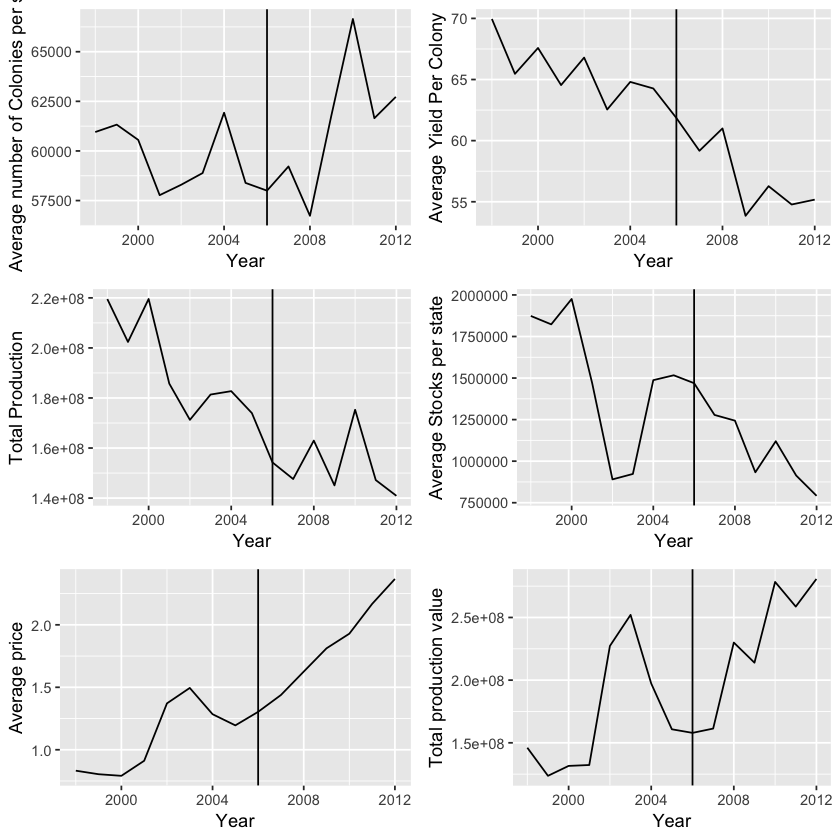

In [18]:
##Combining the plots together
grid.arrange(p1, p2, p3, p4, p5, p6)

The average number of stocks, total production, yield per colony per state declined further after 2006. However, the average number of stocks and yield per colony per state declined at a faster rate compared to its rate of decrease before 2006. As of now, we can see that from the four supply side variables, three of them show a decline after 2006, and two of them show an even faster decline after 2006- it is reasonable to assume,at this point, that CCD has affected the supply of domestic honey in U.S.A. Average price and total production value have increased since 2006. This is because a reduction in supply causes the price of the honey to appreciate. This may indicate a better climate for domestic producers based purely on increasing revenues or a poorer climate because of waning supplies and uncertainty.

# How have states performed since the Colony Collapse Disorder?

Warning message:
“Removed 2 rows containing missing values (position_stack).”Warning message:
“Removed 3 rows containing missing values (position_stack).”

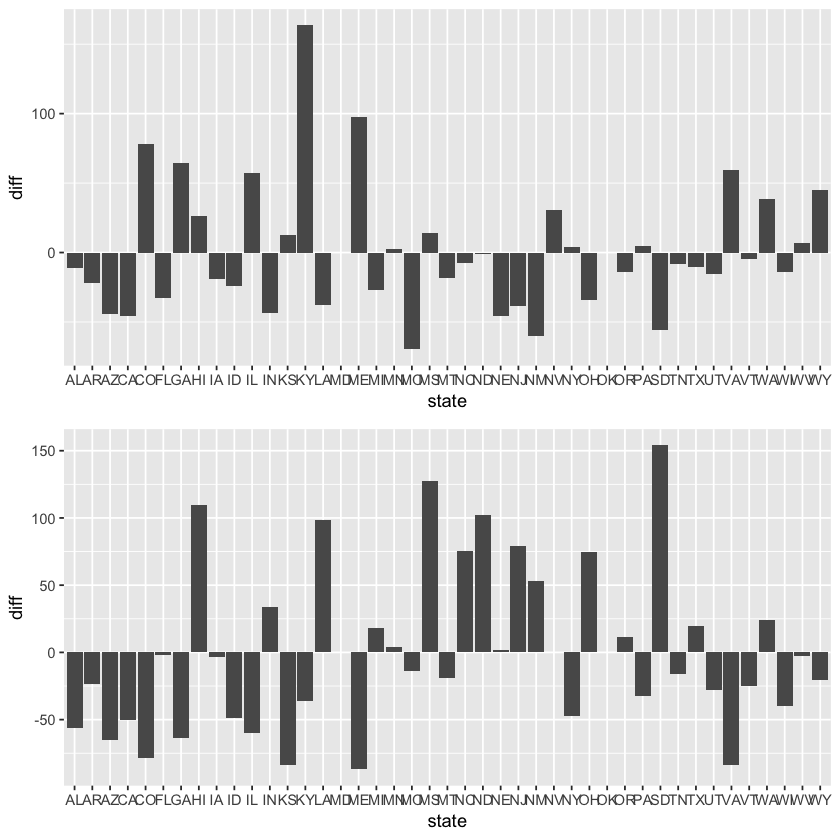

In [20]:
##The percentage change in production value pre-CCD and post-CCD
##Filtering and wrangling the data to obtain percentage changes of variables from 1998 to 2006 and 2006 to 2012.
years <- c(1998, 2006, 2012)
library(openintro)
honey1 <- honey%>%
  filter(year%in%years)%>%
  select(state, year, totalprod, stocks, prodvalue, priceperlb, yieldpercol)%>%
  gather(key, value, -state, -year)%>%
  spread(year, value)%>%
  mutate(p1=(((`2006`-`1998`)/(`1998`)*100)))%>%
  mutate(p2=(((`2012`-`2006`)/(`2006`))*100))%>%
  mutate(s1=abbr2state(state),
         s1=str_to_lower(s1))
p7 <- honey1%>%
  filter(key=="prodvalue")%>%
  mutate(mean=mean(p1, na.rm= TRUE))%>%
  group_by(state)%>%
  mutate(diff=mean(p1, na.rm= TRUE)-mean)%>%
  ggplot(., aes(x=state, y=diff))+
  geom_col()
p8 <- honey1%>%
  filter(key=="prodvalue")%>%
  mutate(mean=mean(p2, na.rm= TRUE))%>%
  group_by(state)%>%
  mutate(diff=mean(p2, na.rm= TRUE)-mean)%>%
  ggplot(., aes(x=state, y=diff))+
  geom_col()
grid.arrange(p7, p8)

Between 1998 and 2006, Missouri, New Mexico, saw the greatest decline in their production value between 1998 and 2006. On the other hand,Kentucky, Maine, and Colorado saw the greatest increase in their production value of honey. Between 2006 and 2012, Maine, Kansas and Virginia saw the greatest decline in production value. South Dakota, Mississippi and Hawaii saw the greatest increase in production value during the same period. I

Warning message:
“Removed 2 rows containing missing values (position_stack).”Warning message:
“Removed 3 rows containing missing values (position_stack).”

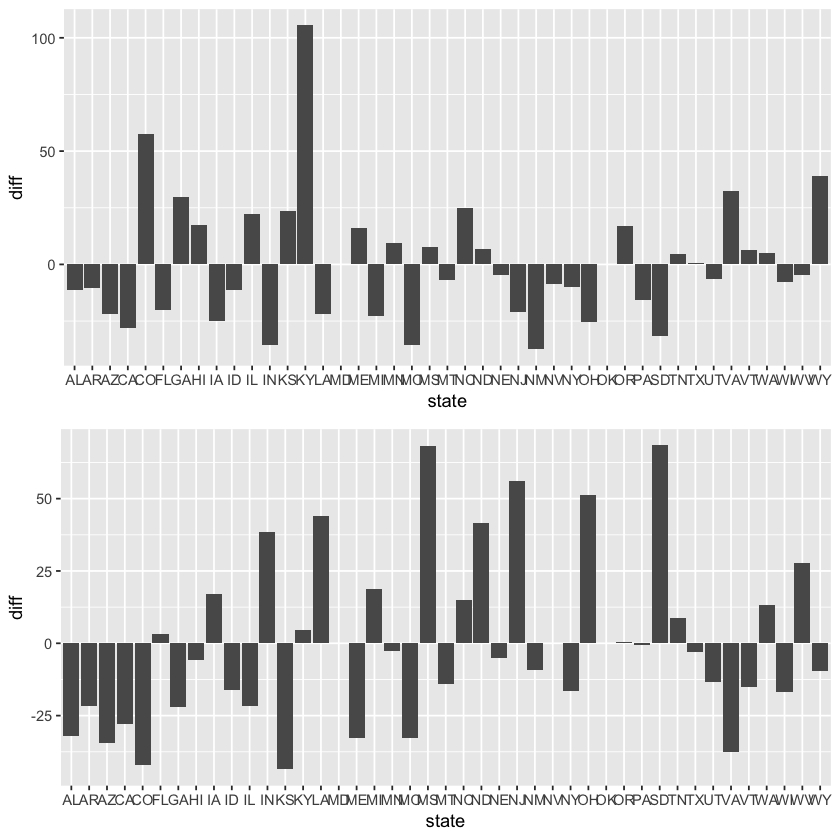

In [22]:
##The percentage change in production value pre-CCD and post-CCD
p9 <- honey1%>%
  filter(key=="totalprod")%>%
  mutate(mean=mean(p1, na.rm= TRUE))%>%
  group_by(state)%>%
  mutate(diff=mean(p1, na.rm= TRUE)-mean)%>%
  ggplot(., aes(x=state, y=diff))+
  geom_col()
p10 <- honey1%>%
  filter(key=="totalprod")%>%
  mutate(mean=mean(p2, na.rm= TRUE))%>%
  group_by(state)%>%
  mutate(diff=mean(p2, na.rm= TRUE)-mean)%>%
  ggplot(., aes(x=state, y=diff))+
  geom_col()

grid.arrange(p9, p10)

Between 1998 and 2006, Missouri, New Mexico, saw greatest decline in their total production between 1998 and 2006. On the other hand, Kentucky, Colorado, and Wyoming saw the greatest increase in their production value of honey. Between 2006 and 2012, Kansas, Colorado and Virginia  saw the greatest decline in production value. South Dakota, Mississippi and New Jersey saw the greatest increase in production value during the same period.

Interestingly, the states with the greatest increases and declines in production value and total production before the CCD are displaced by other states after the CCD. 

# Prices before and after the Colony Collapse Disorder

The price analysis takes into account both geographical regions and states. The idea behind this is to see if prices have regional and state level trends.

Warning message:
“Unknown levels in `f`: CT, MA, NH, RI, DE, AK”Warning message:
“Removed 5 rows containing non-finite values (stat_boxplot).”

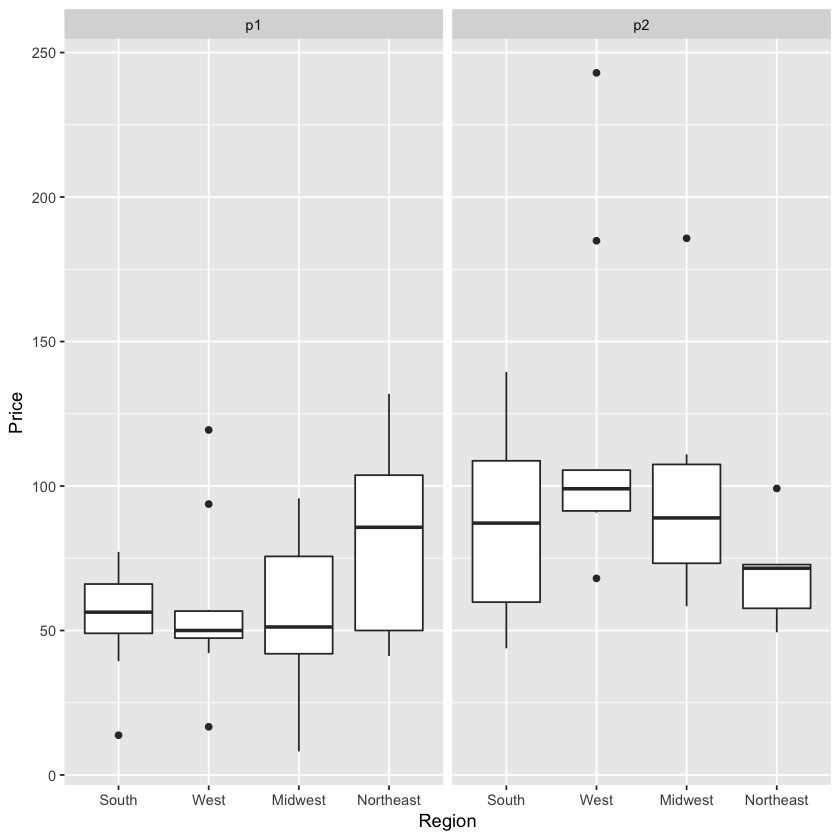

In [23]:
##Regional Price analysis
##Rearranging the states into regions
honey1%>%
  filter(key=="priceperlb")%>%
  select(p1, p2, state)%>%
  gather(key="period", value, -state)%>%
  mutate(reg=fct_collapse(state ,Midwest=c("IL", "IN", "MI", "OH", "WI", "IA", "KS", "MN", "MO", "NE", "ND", "SD"), 
                          Northeast=c("CT", "ME", "MA", "NH","RI","VT","NJ","NY","PA"),
                          South=c("DE", "FL", "GA", "MD", "NC", "SC", "VA", "WV", "AL", "KY", "MS", "TN", "AR", "LA", "OK", "TX"),
                          West=c("AZ", "CO", "ID", "MT", "NV", "NM", "UT", "WY", "AK", "CA", "HI", "OR", "WA")))%>%
  ggplot(., aes(x=reg, y=value))+
  geom_boxplot()+
  facet_grid(.~period)+
  xlab("Region")+
  ylab("Price")

Between 1998 qnd 2006, Prices were generally higher in the Northeast, and tended to be low in the West. The Northeast, however, had the greatest variation but the West had the least variation. Between 2006 and 2012, the prices tended to be higher in the West. Although the South and Midwest also have similar 75th quartiles, the West fluctuated the least because it has the low variation compared to the other regions. 

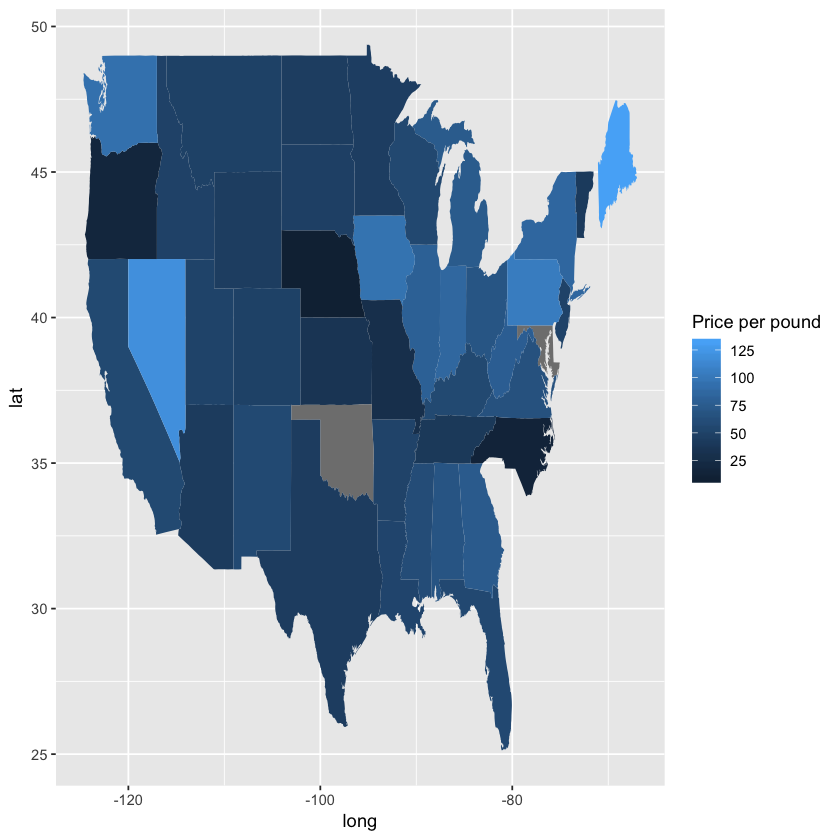

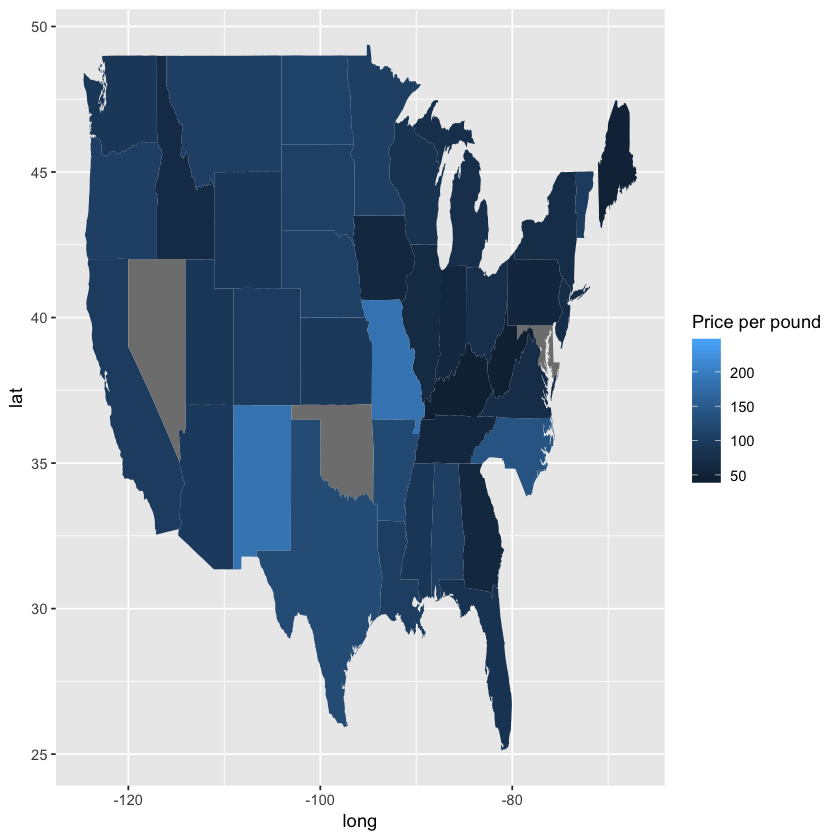

In [26]:
##State analysis
map <- map_data("state")
map1 <- full_join(map, honey1, by=c("region"="s1"))
map1%>%
  filter(key=="priceperlb")%>%
  ggplot(., aes(x=long, y=lat, fill=p1, group=group))+
  geom_polygon()+
  labs(fill="Price per pound")
map1%>%
  filter(key=="priceperlb")%>%
  ggplot(., aes(x=long, y=lat, fill=p2, group=group))+
  geom_polygon()+
  labs(fill="Price per pound")


The prices grew the greatest in Maine, Nevada, and Pennsylvania between 1998 and 2006. The prices grew the least in Nebrraska, North Carolina and Oregon.However, between 2006 and 2012, the prices grew the greatest Hawaii, Missouri and New Mexico. The prices grew the least in Kentucky, West Virginia and Maine.

# Why do some states perform better than others

Production value is the most appropriate metric of performance in this dataset. This is because production value is directly related to revenue and affects a supplier's profits more than a variable like total production. 

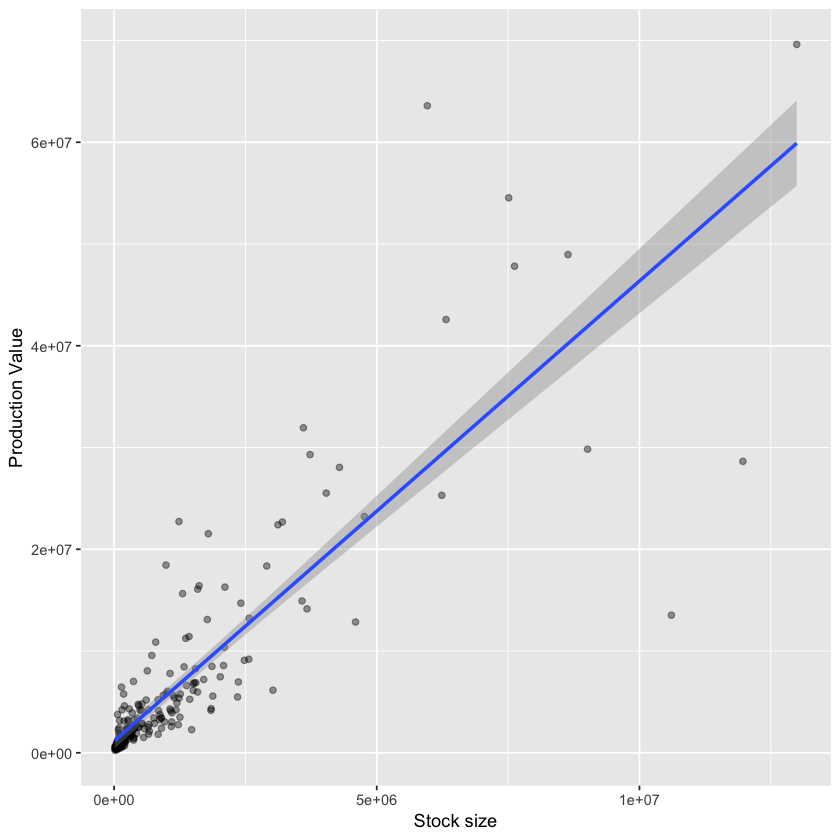

In [27]:
# Graphical analysis of the relationship between stocks and production value
mdat <- honey%>%
  filter(year>2006)
mdat%>%
  ggplot(., aes(x=mdat$stocks ,y=mdat$prodvalue))+
  geom_jitter(alpha=0.4)+
  scale_x_continuous()+
  scale_y_continuous()+
  stat_smooth(method="lm")+
  xlab("Stock size")+
  ylab("Production Value")

The slope of the curve appears to be steep and positive. This could be an indicator of a strong positive correlation.

In [28]:
#Checking correlation
cor(mdat$stocks, mdat$prodvalue)

[1] 0.8563315

Stocks and Production value do show a strong positive correlation.

In [29]:
#Building linear regression model
mod1 <- lm(stocks ~ prodvalue, data=mdat)
print(mod1)
summary(mod1)


Call:
lm(formula = stocks ~ prodvalue, data = mdat)

Coefficients:
(Intercept)    prodvalue  
  9.494e+04    1.622e-01  




Call:
lm(formula = stocks ~ prodvalue, data = mdat)

Residuals:
     Min       1Q   Median       3Q      Max 
-4444466  -207920  -116423    97273  8319896 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 9.494e+04  7.319e+04   1.297    0.196    
prodvalue   1.622e-01  6.312e-03  25.689   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 981300 on 240 degrees of freedom
Multiple R-squared:  0.7333,	Adjusted R-squared:  0.7322 
F-statistic: 659.9 on 1 and 240 DF,  p-value: < 2.2e-16


The null hypothesis, that holding stocks have no effect on production value, is rejected in favor of alternate hypothesis at all levels of significance in favor of alternate hypothesis, that holding more stocks increases production value. With the context of CCD, states that may possess large stocks will be able to take advantage of the higher prices increasing their production value.

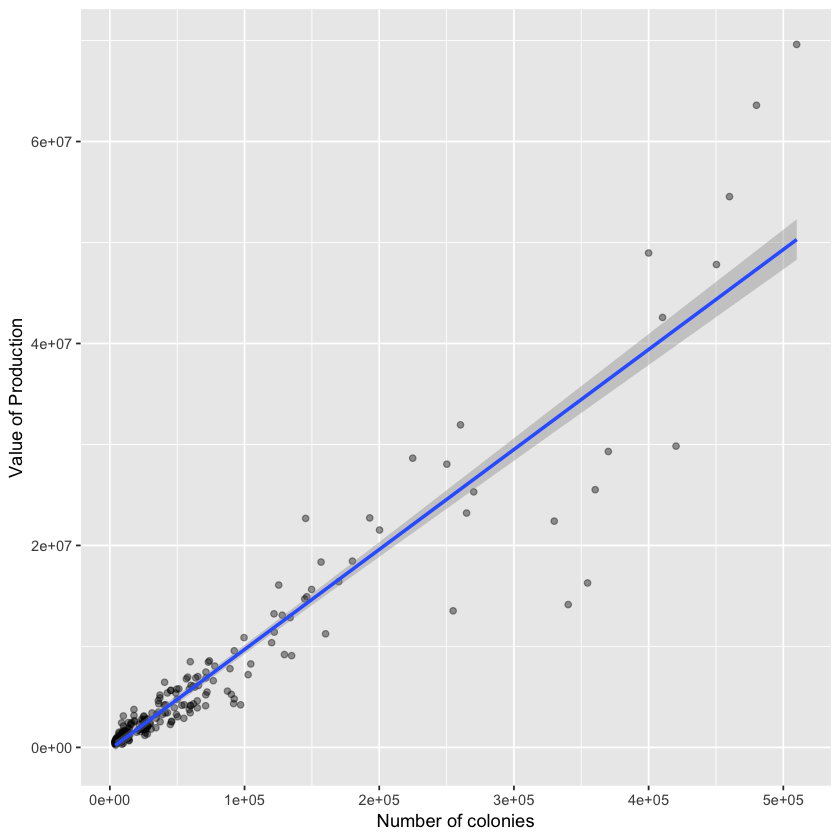

In [30]:
# Graphical analysis of relationship between no. of colonies and production value
mdat%>%
  ggplot(., aes(x=mdat$numcol ,y=mdat$prodvalue))+
  geom_jitter(alpha=0.4)+
  scale_x_continuous()+
  scale_y_continuous()+
  stat_smooth(method="lm")+
  xlab("Number of colonies")+
  ylab("Value of Production")

Once again, the slope of the curve appears to be steep and positive. This could be an indicator of a strong positive correlation.

In [31]:
#Checking correlation
cor(mdat$numcol, mdat$prodvalue)

[1] 0.9447222

Stocks and Production value do show a strong positive correlation.

In [32]:
#Linear regression model
mod3 <- lm(prodvalue ~ numcol, data=mdat)
print(mod3)
summary(mod3)


Call:
lm(formula = prodvalue ~ numcol, data = mdat)

Coefficients:
(Intercept)       numcol  
 -202199.31        99.01  




Call:
lm(formula = prodvalue ~ numcol, data = mdat)

Residuals:
      Min        1Q    Median        3Q       Max 
-19317236   -403127    201154    660724  19322046 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.022e+05  2.516e+05  -0.804    0.422    
numcol       9.901e+01  2.218e+00  44.638   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3290000 on 240 degrees of freedom
Multiple R-squared:  0.8925,	Adjusted R-squared:  0.8921 
F-statistic:  1993 on 1 and 240 DF,  p-value: < 2.2e-16


The null hypothesis, that the number of colonies have no effect on production value, is rejected in favor of alternate hypothesis at all levels of significance in favor of alternate hypothesis, that holding more colonies increases production value. 

# Summary

1) How has honey production in U.S.A. changed over the years? 

Yes. Honey production in the United States saw a continued decline since 1998.

2) What has the impact of the Colony Collapse Disorder been? Has the impact been uniform across all states? 

The CCD acelerated the decline in honey production. Two of the three supply side variables in the dataset show a faster decline after the break of the CCD. The bad performance of honey production post-CCD was not uniform. There were both winners and losers. Price is one of the most important indicators of market performance. Judging by the appreciation in price, it reflects the sharp decline in supply of honey in the United States. Once again, this aopreciation in price is not uniform. Some prices rose faster in some states than others post-CCD. The differential performance of states after the impact of the CCD is clear. 

3) Why do some states perform better than others?

The analysis showed that the number of stocks and the number of colonies states have impact the production value of states. Since production value is synonymous with the income suppliers earn, it was chosen as the metric of performance. The analysis showed that states who hold more stocks and colonies tended to have a higher production value. In other words, holding more stocks and colonies help states perform better. 